# Lab 9 - Frequent Patterns

Name: Jake Schaeffer  
Name: Joanie Gannon  
Class: CSCI 349 - Intro to Data Mining    
Semester: Spring 2020  
Instructor: Brian King

### 1) [P] Add the import statements:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
These first exercises are going to allow you to leverage the actual documentation from the mlxtend user guide
online. Even though the first few of these are copied from their docs, it's good for you to have these examples in
one place. The second part of this lab will use a much more extensive transaction dataset.

In [131]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

### 2) [P] Go to the page: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/ . Enter the list
dataset shown on the page. Then, copy the example code that transforms the list to a numpy encoded
array, then to a pandas DataFrame with the correct column names. Output your data frame. It should look
identical to:

In [132]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


### 3) [P] Show the result of describe() and info() on your dataframe.

In [133]:
print(df.describe())
print()
print(df.info())

        Apple   Corn   Dill  Eggs Ice cream Kidney Beans  Milk Nutmeg Onion  \
count       5      5      5     5         5            5     5      5     5   
unique      2      2      2     2         2            1     2      2     2   
top     False  False  False  True     False         True  True  False  True   
freq        4      3      4     4         4            5     3      3     3   

       Unicorn Yogurt  
count        5      5  
unique       2      2  
top      False   True  
freq         4      3  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
Apple           5 non-null bool
Corn            5 non-null bool
Dill            5 non-null bool
Eggs            5 non-null bool
Ice cream       5 non-null bool
Kidney Beans    5 non-null bool
Milk            5 non-null bool
Nutmeg          5 non-null bool
Onion           5 non-null bool
Unicorn         5 non-null bool
Yogurt          5 non-null bool
dtypes: bool(11)
memory usage:

### 4) [P] Following along the mlxtend user guide, use the apriori algorithm to final all frequent itemsets with a min_support of 0.6. Show the resulting dataframe, and store the result, since you'll have many selection exercises next. All selection exercises must be done from this resulting frame. Set use_colnames=True.
It'll be much easier to interpret your patterns.

In [134]:
apDF = apriori(df, min_support=0.6,use_colnames = True)
apDF

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Kidney Beans, Yogurt)"


### 5) [P] Select all frequent itemsets that have support => 0.8

In [135]:
apDF[apDF.support >= .8]

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
5,0.8,"(Eggs, Kidney Beans)"


### 6) [P] Select all frequent itemsets with at least 2 items. In their documentation, they often create additional helper variables to make it easier to select your data. That's entirely up to you. (I tend to be a purist, and reserve additional variables for only very complex selection criteria. Computing the length of an itemset is not one of them! It's entirely up to you.)

In [136]:
apDF[apDF.itemsets.apply(lambda x: len(x)) >=2]

,support,itemsets
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Kidney Beans, Yogurt)"
10,0.6,"(Onion, Eggs, Kidney Beans)"


### 7) [P] Select the frequent itemsets that contain an 'Onion' in the itemset.

In [137]:
apDF[apDF.itemsets.apply(lambda x: "Onion" in x)]

,support,itemsets
3,0.6,(Onion)
6,0.6,"(Onion, Eggs)"
8,0.6,"(Onion, Kidney Beans)"
10,0.6,"(Onion, Eggs, Kidney Beans)"


### 8) [P] Select the frequent itemsets that contain both 'Onion' and 'Eggs' in the itemset. 
(HINT: You should
have 2 frequent itemsets selected. And, if you haven't learned about the set type in Python and all of the
standard set operations, they can really make these types of questions much easier.)

In [138]:
apDF[apDF.itemsets.apply(lambda x: "Onion" in x and "Eggs" in x)]

,support,itemsets
6,0.6,"(Onion, Eggs)"
10,0.6,"(Onion, Eggs, Kidney Beans)"


### 9) [P] Select the frequent itemsets that contain either an 'Onion' or 'Kidney Beans' (or both) in the itemset.
(HINT: You should have 8 frequent itemsets output.)

In [139]:
apDF[apDF.itemsets.apply(lambda x: "Onion" in x or "Kidney Beans" in x)]

,support,itemsets
1,1.0,(Kidney Beans)
3,0.6,(Onion)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Kidney Beans, Yogurt)"
10,0.6,"(Onion, Eggs, Kidney Beans)"


### 10) [P] http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/ contains the all the information about the association rule interestingness metrics, as well as giving you the code to generate the association rules. 
(NOTE – they mention a function called generate_rules(). The function is
association_rules().) Generate rules with a minimum confidence of 0.7. Store your resulting data
frame called rules. Show the entire data frame. (You should have 12 rules).

In [140]:
rules = association_rules(apDF, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf
1,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0
2,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
3,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
4,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
5,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
6,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
7,"(Onion, Eggs)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
8,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
9,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6


### 11) [P] Output the top 5 rules in descending order by "lift", with the secondary sort key by "confidence".

In [141]:
rules.sort_values(by = ["lift","confidence"],ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
8,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
10,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.00,1.25,0.12,inf
3,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
9,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6


### 12) [P] Select all rules that have a 1.0 support for the antecedent.

In [142]:
rules[rules["antecedent support"] == 1.0]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.8,1.0,0.0,1.0


### 13) [P] Select all rules that have at least 3 or more items represented in the rule (i.e. the union of the antecedent and consequent >= 3.)

In [143]:
#rules[len(rules.antecedents.union(rules.consequents)) >= 3]\

#es.antecedents.apply(lambda x: x.union(rules.consequents))) >= 3]

#halp

### 14) [P] Select the rules that have confidence >= 0.75 and a lift > 1

In [144]:
rules[(rules.confidence >= .75) & (rules.lift > 1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Onion),(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
8,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
10,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.0,1.25,0.12,inf


### 15) [M] Clearly indicate this new section in your notebook:
---  
# Chipotle Data

### 16) [P] Read in the Chipotle dataset:


In [145]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
df_chip = pd.read_csv(url, sep = '\t')

### 17) [P] Show the result of df_chip.info(verbose=True) You should have five variables.

In [146]:
df_chip.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### 18) [P] Show the result of describe(include='all')

In [147]:
df_chip.describe(include = "all")

,order_id,quantity,item_name,choice_description,item_price
count,4622.000000,4622.000000,4622,3376,4622
unique,NaN,NaN,50,1043,78
top,NaN,NaN,Chicken Bowl,[Diet Coke],$8.75
freq,NaN,NaN,726,134,730
mean,927.254868,1.075725,NaN,NaN,NaN
std,528.890796,0.410186,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN
25%,477.250000,1.000000,NaN,NaN,NaN
50%,926.000000,1.000000,NaN,NaN,NaN
75%,1393.000000,1.000000,NaN,NaN,NaN


### 19) [P] Show the first 10 observations

In [148]:
df_chip.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### 20) [M] Study what you see so far. Minimally, you should notice that you have three variables that need to be transformed into usable types. Which ones, and what do you need to do with them?

Price can be turned into a float. Quantity can  be integer. item_name can be a categorical.

### 21) [P] Let's start doing some preprocessing. Convert the item_price field to a floating-point number.

In [149]:
df_chip.item_price = df_chip.item_price.replace('[\$,]', '', regex=True).astype(float)
#ref:
#https://stackoverflow.com/questions/32464280/converting-currency-with-to-numbers-in-python-pandas

### 22) [P] Convert the item_name to a categorical variable (HINT: Use pd.Categorical())

In [150]:
df_chip.item_name = pd.Categorical(df_chip.item_name)

### 23) [P] How many unique item_name values are there?

In [151]:
len(df_chip.item_name.drop_duplicates()) #these do
len(df_chip.item_name.cat.categories)    #the same thing!

50

### 24) [P] Show all of the unique values in item_name . Do you see any potential problems? (Leave them! Don't fix them. Just pay close attention. Need a hint? Salsa)

In [152]:
df_chip.item_name.cat.categories
# their are categories that are different 
# that shouldn't be because the spelling is different(hyphen)

Index(['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito',
       'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Barbacoa Soft Tacos',
       'Bottled Water', 'Bowl', 'Burrito', 'Canned Soda', 'Canned Soft Drink',
       'Carnitas Bowl', 'Carnitas Burrito', 'Carnitas Crispy Tacos',
       'Carnitas Salad', 'Carnitas Salad Bowl', 'Carnitas Soft Tacos',
       'Chicken Bowl', 'Chicken Burrito', 'Chicken Crispy Tacos',
       'Chicken Salad', 'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips',
       'Chips and Fresh Tomato Salsa', 'Chips and Guacamole',
       'Chips and Mild Fresh Tomato Salsa',
       'Chips and Roasted Chili Corn Salsa',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Tomatillo Green Chili Salsa',
       'Chips and Tomatillo Red Chili Salsa',
       'Chips and Tomatillo-Green Chili Salsa',
       'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze',
       'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bowl',
       'Steak Burrit

### 25) [P] How many distinct orders are there?

In [153]:
len(df_chip.groupby(by = "order_id").count()) #4622 line items
#or df_chip.order_id.nunique()

1834

### 26) [P] Show a boxplot of the number of line items per order. Do NOT consider the quantity of each item, just the count of line items. (NOTE: Many items appear multiple times in an order. Don't worry about that. Just count the number of lines per order.)
Your result should indicate that the majority of orders only have 1-3 items ordered.

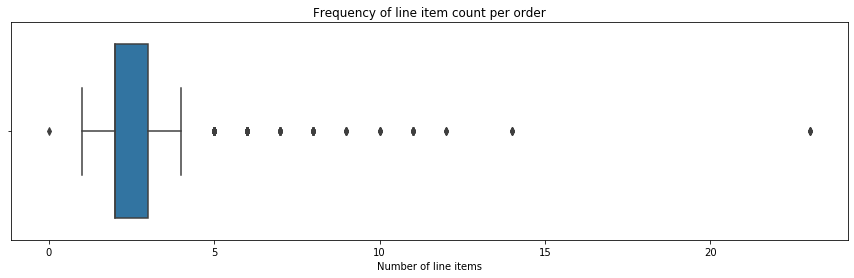

In [154]:
plt.figure(figsize = (15,4))
sns.boxplot(df_chip.groupby(by = "order_id").count())
plt.xlabel("Number of line items")
plt.title("Frequency of line item count per order")
plt.show()

### 27) [P] Show a boxplot of the TOTAL number of items per order. Now, you must consider the quantity of each item in each order. (The box plot will be similar to the previous, with the exception that there will be more outliers, and the maximum outlier will be 35.)

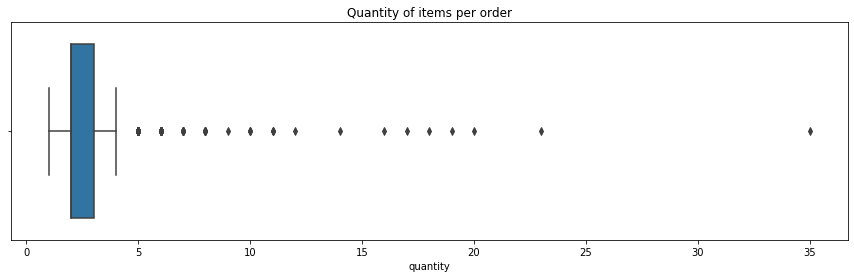

In [155]:
quants = df_chip.groupby(by = "order_id").quantity.sum()

plt.figure(figsize = (15,4))
sns.boxplot(quants)
plt.xlabel("quantity")
plt.title("Quantity of items per order")
plt.show()

### 28) [P] What were the top 5 ordered items by total quantity? Report the item and its total quantity ordered. Be sure to consider the quantity of each item ordered!

In [156]:
items_by_quant = df_chip.groupby("item_name").quantity.sum().sort_values(ascending = False)
items_by_quant.head()

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

### 29) [P] What is the total number of "Steak Burrito" ordered?

In [157]:
items_by_quant["Steak Burrito"]

386

### 30) [P] What is mean price for an order (NOTE – This is NOT just a mean of the item_price column!)

In [158]:
orderPrices = df_chip.groupby("order_id").item_price.sum()  #sum item prices for each order
print("The mean order price for the day was ${:.2f}.".format(orderPrices.mean()))

The mean order price for the day was $18.81.


### 31) [P] What was total revenue for the day?

In [159]:
print("The total revenue for the day was ${:.2f}.".format(orderPrices.sum()))

The total revenue for the day was $34500.16.


### 32) [P] What was the largest total price for a single order? Show the order number and the total price.

In [160]:
print("The most expensive order was #{} with a price of ${}.".format(orderPrices.idxmax(),orderPrices.max()))

The most expensive order was #926 with a price of $205.25.


### 33) [P] Show the entire order to your answer to the previous question
(NOTE: This should show you how some orders can contain multiple lines of the same item. Not uncommon!)

In [161]:
df_chip[df_chip.order_id == orderPrices.idxmax()]

,order_id,quantity,item_name,choice_description,item_price
2304,926,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Lettuce]]",9.25
2305,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
2306,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
2307,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
2308,926,1,Steak Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Lettu...",9.25
2309,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75
2310,926,1,Steak Burrito,"[Roasted Chili Corn Salsa, [Rice, Cheese, Sour...",9.25
2311,926,1,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75
2312,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce]]",8.75
2313,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream...",8.75


### 34) [P] What order had the largest total quantity of items purchased? Show the order number and the total number of items

In [162]:
print("The order with the highest quantity of items was #{} with {} items.".format(quants.idxmax(),quants.max()))

The order with the highest quantity of items was #1443 with 35 items.


### 35) [P] Show the entire order to your answer to the previous question

In [163]:
df_chip[df_chip.order_id == quants.idxmax()]

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25
3599,1443,7,Bottled Water,NaN,10.50
3600,1443,1,6 Pack Soft Drink,[Coke],6.49
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00
3603,1443,3,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",27.75
3604,1443,2,Bottled Water,NaN,3.00


### 36) [P] Recall that this dataset is a set of transactions, where each observation represents one item purchased as part of an order_id. However, the data are not read in this way. You need to transform this dataset to a collection of binary encoded transactions, where each row represents ONE transaction, and the columns are binary encoded variables, with each variable representing ONE item available for purchase at Chipotle.
Convert your data. Your resulting data frame should have an index representing the order_id, and columns
representing each possible item from the item_name variable. For now, a transaction will ignore the
quantity of item purchased.
The shape of your resulting data frame should be (1834,50)

In [164]:
#binarized = pd.DataFrame(index = df_chip.order_id, data = pd.get_dummies(df_chip.item_name))
#binarized = binarized.groupby("order_id").max()
#^^^^ this didnt work and i cant figure out why. it gave me only 251 chicken bowls
binarized = pd.get_dummies(df_chip.item_name)
binarized = binarized.set_index(df_chip.order_id)
binarized = binarized.groupby("order_id").max()
binarized.shape

(1834, 50)

### 37) [P] Show the first 10 observations from your transaction data

In [165]:
binarized.head(10)

item_name,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
order_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### 38) [P] Too often, many start by considering a minimum support that is arbitrarily large. Go ahead and use the apriori method to generate frequent itemsets with a minsup value of 0.5. What happened?

In [166]:
apriori(binarized, min_support=0.5,use_colnames = True)
#data is too sparse for this high of a minsup

,support,itemsets


### 39) [P] Take a step back. Your previous outcome is why you ALWAYS perform essential EDA tasks before you dive into mining a dataset! Report a table that shows the number of transactions each item occurred in, sorted in order of most frequent to least. 
NOTE: That number essentially represents the absolute support for 1- itemsets! So, include a column that shows the relative support (i.e. the fraction of total transactions.) (HINT: The item with the highest support is 33.5%!)

In [167]:
df_sup = binarized.sum().sort_values(ascending = False)
df_sup = pd.DataFrame(support, columns = ["support"])
df_sup["pct_support"] = df_sup.support/ len(binarized)
df_sup

,support,pct_support
item_name,,
Chicken Bowl,615,0.335333
Chicken Burrito,489,0.266630
Chips and Guacamole,474,0.258451
Steak Burrito,342,0.186478
Canned Soft Drink,276,0.150491
Chips,208,0.113413
Steak Bowl,188,0.102508
Bottled Water,154,0.083969
Chips and Fresh Tomato Salsa,110,0.059978


### 40) [P] Now, make a smarter decision. Like many large, real-world transaction datasets, data is sparse! You have many variables, and most observations use only a handful of them. This is the definition of a sparse dataset. You need a better minsup value. Regenerate frequent itemsets, but now use a minsup of 0.005. How many frequent itemsets were reported? Report your frequent items sorted by decreasing support order.

In [168]:
chipap = apriori(binarized,min_support = .005, use_colnames = True)
print("{} items reported with minsup of .005".format(len(chipap)))
chipap.sort_values(by = "support",ascending =False)

146 items reported with minsup of .005


,support,itemsets
11,0.335333,(Chicken Bowl)
12,0.266630,(Chicken Burrito)
18,0.258451,(Chips and Guacamole)
29,0.186478,(Steak Burrito)
7,0.150491,(Canned Soft Drink)
...,...,...
109,0.005453,"(Chips and Guacamole, Chicken Crispy Tacos)"
132,0.005453,"(Steak Burrito, Steak Soft Tacos)"
131,0.005453,"(Veggie Bowl, Steak Bowl)"
112,0.005453,"(Chicken Salad Bowl, Steak Bowl)"


### 41) [M] In the context of association rules, explain the difference between support, confidence, lift, leverage and conviction.

Support is the proportion of observations that contain the given itemset. It is the miniumum of consequent and antecedent support. Confidence is, in an observation, the probability the consequent being present given that the antecedent is present. Lift is a measure of independence of the antecedent and consequent. Lift is the confidence that A implies B divided by B's proportion of support. The proportion of the time where A implies B for all instances where there is B. Leverage is measures indepentence also, but uses the difference between support and confidence instead of ratio. Leverage of 0 means A and B are independent. Leverage of 1 would mean that B depends on A completely. Conviction measures how dependent the consequent is on the antecedent. The conviction is 0 if consequent completely depends on the antecedent, and 1 if they are independent.

### 42) [P] Generate all association rules that meet a minimum support of 0.01. How many rules were output in total?

In [169]:
chiprules = association_rules(chipap, min_threshold=0.01)
len(chiprules)

272

### 43) [P] Show only the rules that have a lift > 2, but sorted in order of decreasing confidence. What is your strongest rule?

In [170]:
chiprules2 = association_rules(chipap, metric="lift", min_threshold=2)
chiprules2.sort_values(by = "confidence", ascending = False) 
# canned frink, chips, salse -> chicken bowl

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
22,"(Canned Soft Drink, Chips and Tomatillo Red Ch...",(Chicken Bowl),0.009815,0.335333,0.008179,0.833333,2.485095,0.004888,3.988004
14,"(Chips, Bottled Water)",(Chicken Bowl),0.019084,0.335333,0.015267,0.800000,2.385691,0.008868,3.323337
32,"(Chips, Chips and Guacamole)",(Chicken Bowl),0.009815,0.335333,0.007088,0.722222,2.153749,0.003797,2.392803
21,"(Chicken Bowl, Chips and Tomatillo Red Chili S...",(Canned Soft Drink),0.015812,0.150491,0.008179,0.517241,3.437031,0.005799,1.759698
13,"(Chicken Bowl, Bottled Water)",(Chips),0.037623,0.113413,0.015267,0.405797,3.578038,0.011000,1.492061
7,(Chips and Tomatillo Green Chili Salsa),(Canned Soft Drink),0.023446,0.150491,0.009269,0.395349,2.627064,0.005741,1.404958
9,(Chips and Tomatillo Red Chili Salsa),(Canned Soft Drink),0.025082,0.150491,0.009815,0.391304,2.600189,0.006040,1.395622
5,(Canned Soda),(Steak Burrito),0.051254,0.186478,0.019629,0.382979,2.053751,0.010071,1.318467
25,(Chips and Tomatillo Red Chili Salsa),"(Chicken Bowl, Canned Soft Drink)",0.025082,0.060523,0.008179,0.326087,5.387779,0.006661,1.394062
18,"(Chicken Bowl, Canned Soft Drink)",(Chips),0.060523,0.113413,0.019084,0.315315,2.780232,0.012220,1.294883


### 44) [M] Consider yourself the data scientist hired to help Chipotle understand item purchasing patterns. Interpret the following rule for the non data scientist. Be careful not to say, "if your customers purchase canned soft drinks AND chips, they are also going to buy chicken bowls." Think! What do strong association rules convey?

customers that buy a canned drink and chips are likely to buy a chicken bowl.

### 45) [P] Suppose your boss is interested in what items are most likely related to a purchase of "Chips and Guacamole". Using your rule set generated, first select the rules that have "Chips and Guacamole" listed in the consequent itemset. Sort the rules by confidence, then by lift. And interpret your findings. Identify the item(s) that are the most suggestive of including "Chips and Guacamole" when purchased, and state why.

In [176]:
print("Chicken Soft Tacos seem to be bought with chips and guac because both are bought when the other in a significant proportion of orders")
chiprules2[chiprules2.consequents.apply(lambda x: "Chips and Guacamole" in x)].sort_values(by = ["confidence","lift"], ascending = False)

Chicken Soft Tacos seem to be bought with chips and guac because both are bought when the other in a significant proportion of orders


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(Chicken Soft Tacos),"(Chips and Guacamole, Canned Soft Drink)",0.058342,0.033806,0.005453,0.093458,2.764546,0.003480,1.065802
31,(Canned Soft Drink),"(Chips and Guacamole, Chicken Soft Tacos)",0.150491,0.017448,0.005453,0.036232,2.076540,0.002827,1.019490
33,(Chicken Bowl),"(Chips, Chips and Guacamole)",0.335333,0.009815,0.007088,0.021138,2.153749,0.003797,1.011568


### 46) [P] These data suggest that the "Chicken Bowl" is the single most frequent item purchased for this particular location. Great. Let's dive into those chicken bowls more. As you know, Chipotle lets you customize your items. That's what the choice_description field is for. Process all of the items listed in the "choice_description" field by creating a new transaction dataset representing binary encoded transaction data for only Chicken Bowl. 
Note – this is tricky because the choice_description variable is read in as a long string. The string itself represents a list, and quite often, it's a list of lists. You need to process this to be an actual flattened list of items. Then, you can easily convert these to transactions. This page will give you an idea on how to do it.
https://chrisalbon.com/python/data_wrangling/pandas_expand_cells_containing_lists/ . However, keep in
mind that many of these lists contain lists themselves! You may need to just write a python function that takes
in a list of lists, and returns a single list of all of the items flattened out. Then, apply that function.

In [188]:
chicken_bowls = df_chip[df_chip.item_name == "Chicken Bowl"]
#convert choice_description, a series of strings to a series of lists
descs = chicken_bowls.choice_description.apply(lambda x: x.strip("][").split(", "))
#convert the series of lists to a series of series
descs = descs.apply(lambda x:pd.Series(x))
descs

,0,1,2,3,4,5,6,7,8
4,Tomatillo-Red Chili Salsa (Hot),[Black Beans,Rice,Cheese,Sour Cream,NaN,NaN,NaN,NaN
5,Fresh Tomato Salsa (Mild),[Rice,Cheese,Sour Cream,Guacamole,Lettuce,NaN,NaN,NaN
13,Fresh Tomato Salsa,[Fajita Vegetables,Rice,Cheese,Sour Cream,Guacamole,NaN,NaN,NaN
19,Tomatillo Red Chili Salsa,[Fajita Vegetables,Black Beans,Sour Cream,Cheese,Lettuce,NaN,NaN,NaN
26,Roasted Chili Corn Salsa (Medium),[Pinto Beans,Rice,Fajita Veggies,Cheese,Sour Cream,Lettuce,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4590,Roasted Chili Corn Salsa,[Rice,Black Beans,Cheese,Lettuce,Guacamole,NaN,NaN,NaN
4591,Tomatillo Red Chili Salsa,[Rice,Black Beans,Sour Cream,Cheese,Lettuce,NaN,NaN,NaN
4595,Tomatillo Green Chili Salsa,[Rice,Black Beans,NaN,NaN,NaN,NaN,NaN,NaN
4599,Roasted Chili Corn Salsa,[Cheese,Lettuce,NaN,NaN,NaN,NaN,NaN,NaN


### 47) [P,M] Use your own knowledge to generate strong frequent patterns and association rules for the
choice_description items used with Chicken Bowls. Explain your findings.